confusion matrix (혼돈 행렬) : TP(True Positive), FP(False Positive), TN(True Negative), FN(False Negative)

TP : True (정답) Positive(정답 예측)

TN : True (정답) Negative(오답 예측)

FP : False (오답) Positive(정답 예측)

FN : False (오답) Negative(오답 예측)

---

Precision = TP / (TP + FP) : true 로 분류한 것 중 정답 비율

Recall = TP / (TP + fn) : 실제 true 중 true로 예측한 비율


TPR : True (정답) Positive (정답 예측) Rate

FPR : False (오답) Positive (정답 예측) Rate

precision_recall_curve 

threshold 기준으로 Positive, Negative 예측

threshold가 높아지면 precision이 높아짐 : FP 낮아짐(오답을 정답이라고 예측) = FN 높아짐(오답을 오답이라 예측) -> FPR 낮아짐
-> 여학생을 여학생이라고 잘 예측함 (대부분 여학생)

threshold가 낮아지면 recall이 높아짐 : FP 높아짐 = FN 낮아짐 -> FPR 높아짐
-> 남학생도 여학생이라고 예측함

여학생을 여대로 진학시키려 할 때, threshold를 어디로 보내야 할까? -> 오른쪽 (여학생을 여학생이라고 잘 예측해야 되니까 - 남학생을 여대로 보내면 안됨!)

여학생들에게 머리핀 선물을 해줘야 한다면 threshold를 어디로? -> 왼쪽 (남학생도 여학생이라고 예측되서 머리핀 받았다 쳐도, 큰 문제 없으니까)

---

accuracy (score) : 정답 / 전체 -> TP + TN / TP + TN + FP + FN

f1_score : Precision 과 Recal의 조화평균 2 * (precision * recall / precision + recall)
- Precision (정밀도) : TP / TP + fp -> true 로 분류한 것 중 정답 비율
- Recall (재현률 / 민감도) : TP / TP + FN -> 실제 true 중 true로 예측한 비율

ROC curve / AUC
- TPR(True Positive Rate) : TP / TP + FN = recall
- FPR(False Positive Rate) : FP / FP + TN = 실제 false 중 false로 예측한 비율
- ROC( Receiver Operating Characteristic ) :  재현률을 좀더 명확하게 판단하기 위한 것 -> 판별기준이 낮을 수록 Positive로 예측하는 수가 증가한다.
- ROC는 0 ~ 1까지의 그래프로 그려진다. (비율이니까)
- AUC (Area Under the ROC Curve) 는 1인 경우에 가장 분류 모델의 성능이 좋다고 판단한다.
- AUC  0.5 보다 크면 무작위로 만든 분류모델보다는 성능이 좋다고 판단한다.
  반대로 낮다면 분류모델에 문제가 있다라고 판단한다.


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
x = iris.data
y = iris.target

In [6]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [9]:
model = LogisticRegression()

In [10]:
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
x_test

array([[5.8, 4. , 1.2, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.9, 3.8, 6.4, 2. ],
       [6.3, 3.3, 4.7, 1.6],
       [6.9, 3.1, 5.1, 2.3],
       [5.1, 3.8, 1.9, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.7, 4.2, 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [7.1, 3. , 5.9, 2.1],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 2.9, 4.5, 1.5],
       [4.4, 3.2, 1.3, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5.6, 3. , 4.5, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [5.4, 3. , 4.5, 1.5],
       [6.7, 3. , 5. , 1.7],
       [5. , 3.5, 1.3, 0.3],
       [7.2, 3.2, 6. , 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [6.1, 2.8, 4.7, 1.2],
       [6.3, 2.5, 5. , 1.9],
       [6.1, 3. , 4.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.6, 2.5, 3.9, 1.1],
       [6.4, 2.8, 5.6, 2.1],
       [5.8, 2

In [24]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1])

In [11]:
predict = model.predict(x_test)
predict

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1])

In [12]:
cm = confusion_matrix(y_test, predict)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]])

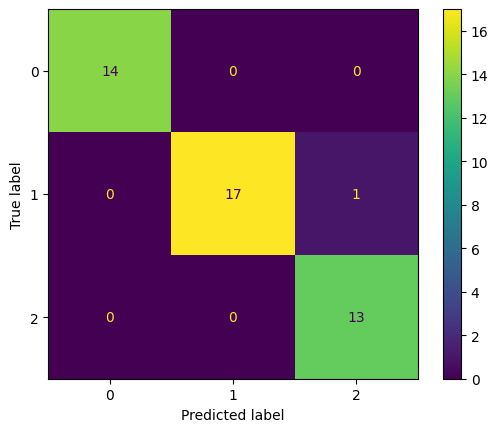

In [ ]:
ConfusionMatrixDisplay(cm).plot()

In [14]:
precision = precision_score(y_test, predict, average=None)

for target, score in zip(iris.target_names, precision):
    print(f"{target}의 정밀도 {score}")

setosa의 정밀도 1.0
versicolor의 정밀도 1.0
virginica의 정밀도 0.9285714285714286


In [15]:
recall = recall_score(y_test, predict, average=None)

for target, score, in zip(iris.target_names, recall):
    print(f"{target}의 재현률 : {score}")

setosa의 재현률 : 1.0
versicolor의 재현률 : 0.9444444444444444
virginica의 재현률 : 1.0


In [16]:
f1 = f1_score(y_test, predict, average=None)

for target,score, in zip(iris.target_names, f1):
    print(f"{target}의 f1 : {score}")

setosa의 f1 : 1.0
versicolor의 f1 : 0.9714285714285714
virginica의 f1 : 0.9629629629629629


In [17]:
accuracy = accuracy_score(y_test, predict)
print(f"score : {accuracy}")

score : 0.9777777777777777


In [18]:
report = classification_report(y_test, predict, output_dict=True)
print(report)

df = pd.DataFrame(report)
df.rename(columns=dict(zip(["0", "1", "2"], iris.target_names)), inplace=True)
df

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 14.0}, '1': {'precision': 1.0, 'recall': 0.9444444444444444, 'f1-score': 0.9714285714285714, 'support': 18.0}, '2': {'precision': 0.9285714285714286, 'recall': 1.0, 'f1-score': 0.9629629629629629, 'support': 13.0}, 'accuracy': 0.9777777777777777, 'macro avg': {'precision': 0.9761904761904763, 'recall': 0.9814814814814815, 'f1-score': 0.9781305114638448, 'support': 45.0}, 'weighted avg': {'precision': 0.9793650793650793, 'recall': 0.9777777777777777, 'f1-score': 0.9778718400940623, 'support': 45.0}}


,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,1.000000,0.928571,0.977778,0.976190,0.979365
recall,1.0,0.944444,1.000000,0.977778,0.981481,0.977778
f1-score,1.0,0.971429,0.962963,0.977778,0.978131,0.977872
support,14.0,18.000000,13.000000,0.977778,45.000000,45.000000


In [19]:
proba = model.predict_proba(x_test)
proba

array([[9.85025369e-01, 1.49745465e-02, 8.47918241e-08],
       [2.73870339e-01, 7.22403367e-01, 3.72629406e-03],
       [6.87872188e-03, 8.67910184e-01, 1.25211095e-01],
       [9.85580981e-01, 1.44187940e-02, 2.25310011e-07],
       [1.61762311e-06, 1.99353178e-02, 9.80063065e-01],
       [4.82076273e-03, 5.87872460e-01, 4.07306777e-01],
       [1.74155074e-04, 1.29200476e-01, 8.70625369e-01],
       [9.58218389e-01, 4.17780859e-02, 3.52555966e-06],
       [9.68302367e-01, 3.16967912e-02, 8.41650715e-07],
       [1.34382710e-05, 3.10695265e-02, 9.68917035e-01],
       [1.98946565e-02, 8.69216880e-01, 1.10888464e-01],
       [9.67083167e-01, 3.29154347e-02, 1.39859392e-06],
       [7.00811418e-06, 3.82224300e-02, 9.61770562e-01],
       [7.71309220e-03, 7.66892451e-01, 2.25394457e-01],
       [7.47573794e-03, 7.31252522e-01, 2.61271740e-01],
       [9.87344807e-01, 1.26549961e-02, 1.97260221e-07],
       [2.35786395e-02, 9.29632479e-01, 4.67888815e-02],
       [1.15650003e-02, 6.62101

In [20]:
print(f"shape : {proba.shape}")
print(f"sum: {proba.sum(axis=1)}")

shape : (45, 3)
sum: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


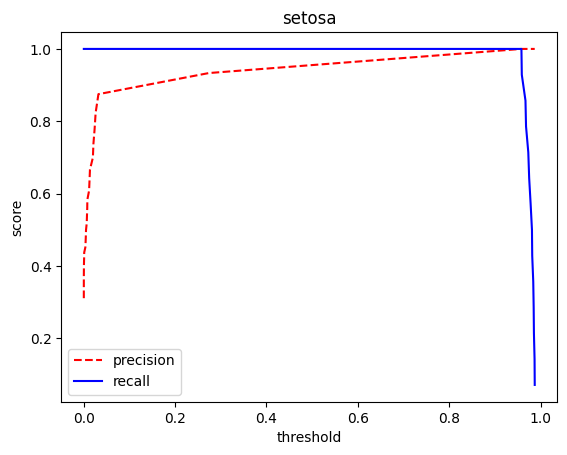

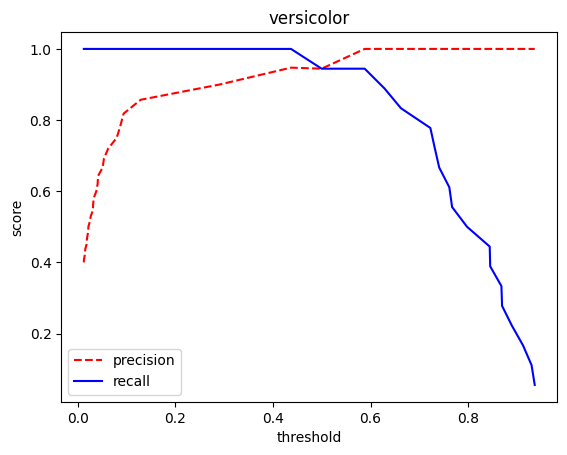

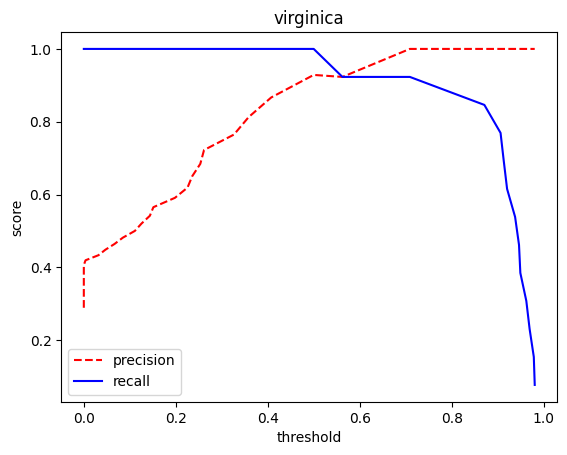

In [21]:
for i in range(len(iris.target_names)):
    precision, recall, thresholds = precision_recall_curve(y_test, proba[:, int(i)], pos_label=int(i))

    plt.xlabel("threshold")
    plt.ylabel("score")
    plt.plot(thresholds, precision[: len(thresholds)], "red", linestyle="--", label="precision")
    plt.plot(thresholds, recall[: len(thresholds)], "blue", label="recall")

    plt.legend()
    plt.title(iris.target_names[i])
    plt.show()

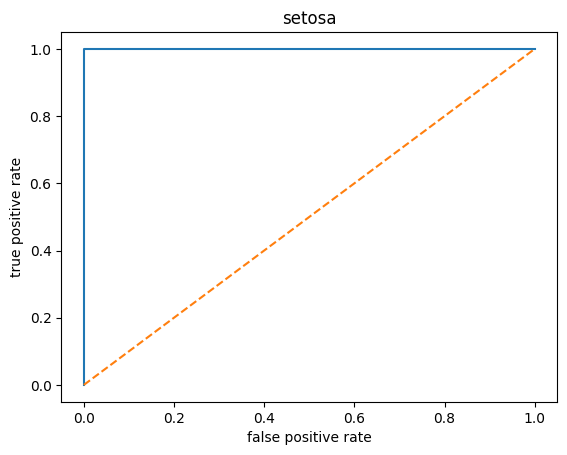

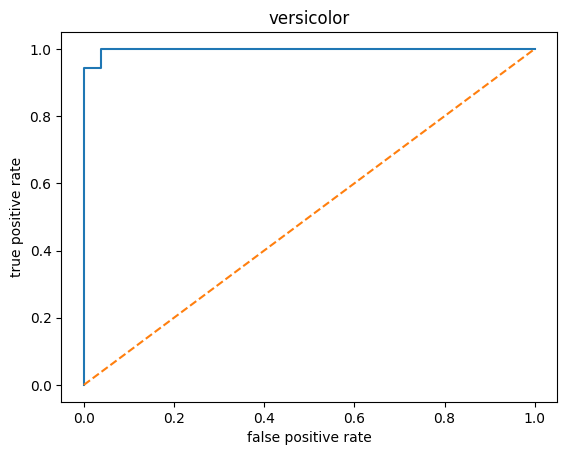

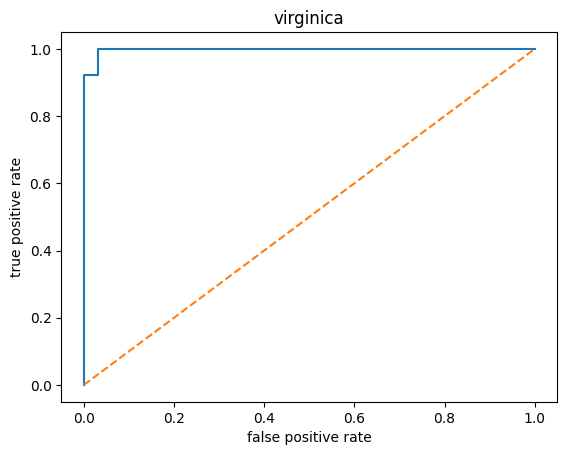

In [22]:
for i in range(len(iris.target_names)):
    fprs, tprs, thresholds = roc_curve(y_test, proba[:, int(i)], pos_label=int(i))
    plt.plot(fprs, tprs)

    plt.plot([0, 1], [0, 1], "--")
    plt.title(iris.target_names[i])

    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")

    plt.show()

In [23]:
roc_auc = roc_auc_score(y_test, proba, multi_class="ovo")
roc_auc

np.float64(0.9985754985754985)